# Nonlinear SVCs

In the real world, datasets dont come close to becoming linearly seperable. One approach to handle nonlinear datasets is to add more features such that they become linearly seperable.


## The Kernal Trick

The kernal trick is a mathematic technique that maps instances into a very high-dimensional space in order to enable nonlinear classification and regression.

### Polynomial Features

As a simple example. Suppose we had the following nonlinearly seperable dataset:

Note that although this is plotted in 2d space, it is in reality a single feature in 1d.

[-4.5, 4.5, -0.2, 0.2]

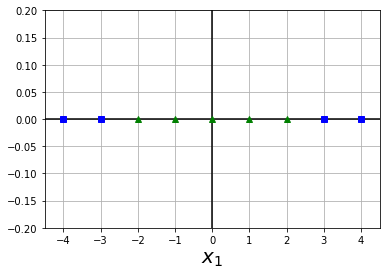

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

ax = plt.gca()
ax.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

Only possible way to the data linear seperable is to introduce a polynomial feature with degree 2, and expand our dataset into 2 dimensional space.

[-4.5, 4.5, -1, 17]

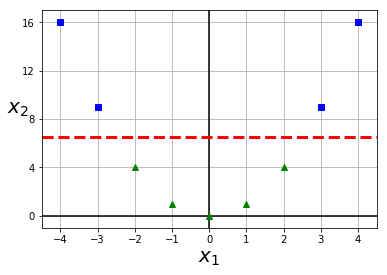

In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X2D = poly.fit_transform(X1D)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

Now, even though we originally could not have made a linear based classification, by synthetically creating an additional feature, we now can.

To illustrate this better in actions, lets look at the moons dataset.

Sample Transformed Data: (100, 10)
[[ 1.00000000e+00  1.61383833e+00 -4.91150863e-01  2.60447417e+00
  -7.92638091e-01  2.41229171e-01  4.20320026e+00 -1.27918974e+00
   3.89304883e-01 -1.18479915e-01]
 [ 1.00000000e+00  8.98472311e-02  5.04390562e-01  8.07252494e-03
   4.53180954e-02  2.54409839e-01  7.25294014e-04  4.07170539e-03
   2.28580196e-02  1.28321921e-01]]
...


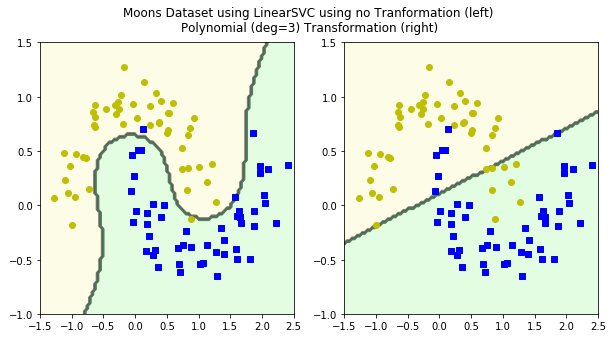

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from mltoolbox.draw.classification import plot_2d_decision_boundary


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

X_sample = PolynomialFeatures(degree=3).fit_transform(X)
print(f'Sample Transformed Data: {X_sample.shape}')
print(X_sample[0:2,:])
print('...')

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000))
))
nonpolynomial_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000))
))
polynomial_svm_clf.fit(X, y)
nonpolynomial_svm_clf.fit(X, y)

plot_2d_decision_boundary([polynomial_svm_clf, nonpolynomial_svm_clf], X, y, (-1.5, 2.5), (-1, 1.5), 100, 100, 
                          suptitle='Moons Dataset using LinearSVC using no Tranformation (left) \nPolynomial (deg=3) Transformation (right)', 
                          fig_size=(10, 5))

**But wait, how can a linear SVM make what looks to be a nonlinear based decision boundary?**

By introducing an additional polynomial features (9 more infact), the original dataset was tranformed into 9 dimensional space. Now, just like before how we were able to draw a line through the 2 dimensional tranformation, a line drawn through the 9 dimensional space projected back onto 2-d space reveals this result. In general, a linear boundary in high dimensional space cooresponds to a complex nonlinear decision boundary in the original space.


**Applying The Kernal Trick**

Now, rather than creating what potentially could be 100 or more polynomial features potentially making the model slow as a result, using the "kernal trick", it is possible to achieve the same result is if adding a high number of polynomial features.

The main benefit here is that we dont get a huge combinatorial explosion from the number of features.

**Example**

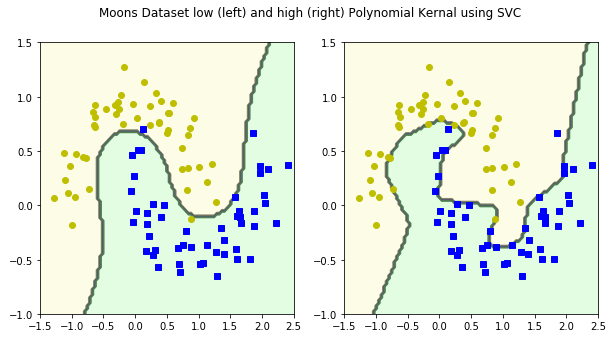

In [4]:
from sklearn.svm import SVC


poly_kernel_svm_clf_low_deg = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf_high_deg = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=100, coef0=1, C=5))
))


poly_kernel_svm_clf_low_deg.fit(X, y)
poly_kernel_svm_clf_high_deg.fit(X, y)

plot_2d_decision_boundary([poly_kernel_svm_clf_low_deg, poly_kernel_svm_clf_high_deg], X, y, (-1.5, 2.5), (-1, 1.5), 100, 100, 
                          suptitle='Moons Dataset low (left) and high (right) Polynomial Kernal using SVC',
                          fig_size=(10, 5))

### Similiarity Features

Another approach to tackling nonlinear problem is to add features using a _similiar function_. The similiarity function measures how each features resembles a particular _landmark_.

For example, lets add two landmarks onto the 1D dataset.

[-4.5, 4.5, -0.2, 0.2]

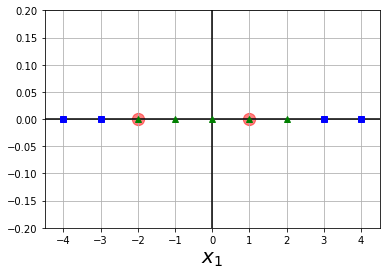

In [5]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
Y1D = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

ax = plt.gca()
ax.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X1D[:, 0][Y1D==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][Y1D==1], np.zeros(5), "g^")
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

If we let our similiarity function be the _Gaussian Radial Basis Function (RBF)_, then we can use this calculate an additioanl feature based off how each instance compares to the landmark.

$$\phi_{\gamma}(x, l) = exp(- \gamma || x- l ||^2)$$

* $\phi$ = RBF
* $\gamma$ = hyperparameter
* $x$ = input data
* $l$ = landmark

RBF is a bell shaped function that looks like this:

In [6]:
def gaussian_rbf(x, landmark, gamma=.3):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

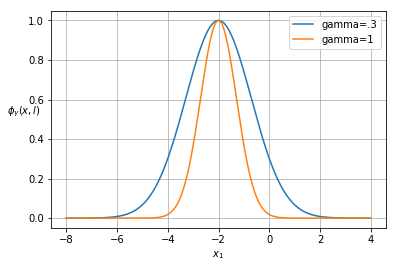

In [7]:
from mltoolbox.draw.math import plt_2d_functions

gamma1, gamma2 = .3, 1
landmark=-2
plt_2d_functions([lambda x: np.exp(-gamma1 * np.linalg.norm(x - landmark, axis=1)**2),
                  lambda x: np.exp(-gamma2 * np.linalg.norm(x - landmark, axis=1)**2)], 
                 x=np.arange(-8,4,.01).reshape(-1,1),
                 suptitle=r'$\phi_{\gamma}(x, l) = exp(- \gamma || x- l ||^2)$', xlabel=r'$x_1$', 
                 ylabel=r'$\phi_{\gamma}(x, l)$', one_plot=True, labels=['gamma=.3', 'gamma=1'])

The main idea behind the similiarity function (RBF in our case), is that it takes a landmark as the center of the distribution and also the maximum similiarity (=1), and deviates out in left and right directions where the distance away from the center landmark acts as a hieristic for similiarity.

You may wondering which function do you map to if you have 2 more more landmarks. The answer is you have as many additioanl features as you do landmarks. For simplicity and visualization purposes, lets plot the RBF on two landmarks in the dataset, $x=-2$ and $x=1$, and see how the translational mappings might look like. 

[-6.0, 6.0, -0.04, 1.1]

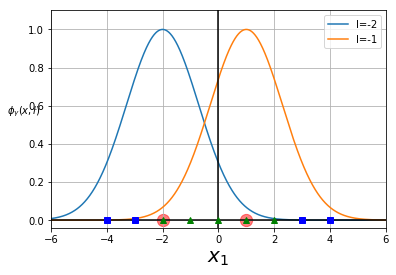

In [8]:
gamma=.3
landmark1, landmark2= -2, 1

plt_2d_functions([lambda x: np.exp(-gamma * np.linalg.norm(x - landmark1, axis=1)**2),
                  lambda x: np.exp(-gamma * np.linalg.norm(x - landmark2, axis=1)**2)], 
                  x=np.arange(-8,8,.01).reshape(-1,1),
                  suptitle=r'$\phi_{\gamma}(x, l) = exp(- \gamma || x- l ||^2)$', xlabel=r'$x_1$', 
                  ylabel=r'$\phi_{\gamma}(x, l)$', one_plot=True, labels=['l=-2', 'l=-1'])

ax = plt.gca()
# ax.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X1D[:, 0][Y1D==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][Y1D==1], np.zeros(5), "g^")
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-6.0, 6.0, -0.04, 1.1])

Now following through the translation we get something like this:

Text(0, 0.5, '$x_2$')

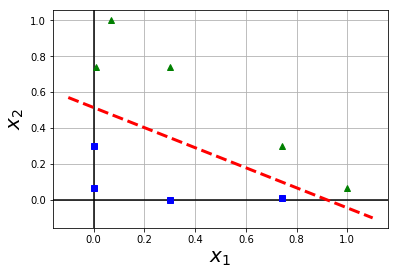

In [9]:
X1_rbf = gaussian_rbf(X1D, landmark1, gamma)
X2_rbf = gaussian_rbf(X1D, landmark2, gamma)


ax = plt.gca()
ax.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X1_rbf[Y1D==0], X2_rbf[Y1D==0], "bs")
plt.plot(X1_rbf[Y1D==1], X2_rbf[Y1D==1], "g^")
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

Which as we can see, is now linearly seperable.

**How many landmarks are needed?**

The more landmarks, the higher the dimension of your dataset will be and therefore will increase the changes your data will be linearly seperable. A simple approach would be to have as many landmarks as you do instances (x-rows). This means if your dataset is (m, n), it will become (m, m) because l=m and then number of landmarks become the number of features in the dataset.

**Applying the Kernal Trick**

Just like before, computing similiar features can get computationally expensive. We can reap the same benefits by appling the same kernal trick using an RBF kernal.

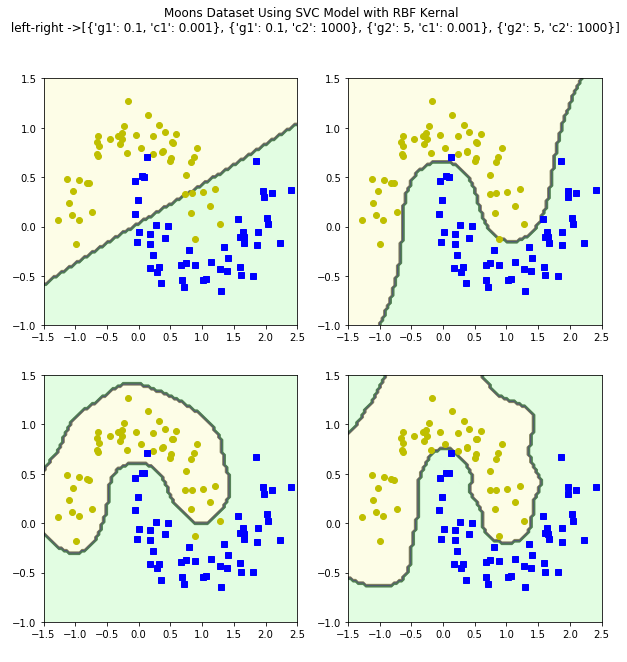

In [22]:
from mltoolbox.utils.iterables import all_combinations


gammas = [0.1, 5]
cs = [0.001, 1000]
gamma_c_combs = all_combinations([gammas, cs])

clfs = []
for gamma, c in gamma_c_combs:
    rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=c))
    ))
    rbf_kernel_svm_clf.fit(X, y)
    clfs.append(rbf_kernel_svm_clf)

add_title = all_combinations([{'g1':.1, 'g2':5}, {'c1':.001, 'c2':1000}])
plot_2d_decision_boundary(clfs, X, y, (-1.5, 2.5), (-1, 1.5), 100, 100, 
                          suptitle='Moons Dataset Using SVC Model with RBF Kernal \n left-right ->' + str(add_title),
                          fig_size=(10, 10))

A high gamma (bottom row) descreases the variability in the RBF (making it thinner). As a result, the distances are shorter and the decision boundary becomes more irrelgular since the range of influence is smaller.

Conversely a low gamma (top row) has a larger spread, larger distances and hence greater range of influence resulting in a smoother, less overfit model.

The hyperparameter of C follows the same idea as gamma.


### Other Kernals

Other kernals exist, but are less commonly used. This is because they are domain specific. For example, there are string kernals for classifying text documents or DNA sequences). As a rule of thumb linear kernals are recommended to try first because they are faster. For more applications an RBF kernal tends to work the best.

## Time Complexity Summary

| Class         |  Time complexity           |  Out-of-core support |  Scaling required |  Kernel trick | 
|---------------|----------------------------|----------------------|-------------------|---------------| 
| LinearSVC     |  $O(m \cdot n)$                  |  No                  |  Yes              |  No           | 
| SGDClassifier |  $O(m \cdot n)$                  |  Yes                 |  Yes              |  No           | 
| SVC           |  $O(m^2 \cdot n)$ to $O(m^3 \cdot n)$ |  No                  |  Yes              |  Yes          | 

